# Read RGB fits and reproduce ODISEA paper image

In [1]:
# For Sky Plots se: http://docs.astropy.org/en/stable/visualization/wcsaxes/ticks_labels_grid.html
import numpy as np
from astropy.table import Table, join, vstack, hstack, Column, MaskedColumn

from astropy import coordinates, units as u, wcs
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
import matplotlib
from astropy.io import fits

In [2]:
def readfits(fits_path):
# --------------
# Fits reader
# --------------
    hdu  = fits.open(fits_path)
    head = hdu[0].header
    data = np.nan_to_num(hdu[0].data)
    return {'data':data, 'hdr':head, 'wcs':wcs.WCS(head)}

def make_img(img_dict, sample_A, sample_B, vmin = 0, vmax = 40, ftsize = 10, mec_a = 'w', mec_b = 'g', mew = 2,
             markersize = 10, alpha = 1.0, figname = 'dummy.pdf', legend_color = 'white', figsize = [20,7]):
# --------------
# Image Plotter
# --------------
    img          = img_dict['data']
    hdr          = img_dict['hdr']
    img_wcs      = img_dict['wcs']
    markersize_b = markersize * 0.75
    
    fig = plt.figure(figsize=figsize)
    ax  = fig.add_subplot(111, projection=img_wcs)
    matplotlib.rcParams.update({'font.size': ftsize})  # << Change AXIS fontsize


    ra  = ax.coords[0]
    dec = ax.coords[1]

    ra.set_axislabel ('RA',  fontsize = ftsize)
    dec.set_axislabel('Dec', fontsize = ftsize)

    ra.set_major_formatter('dd')
    dec.set_major_formatter('dd')

    
    img = ax.imshow(img, cmap='viridis', origin='lower', vmin = vmin, vmax = vmax)

    ax.set_autoscale_on(False) # Avoid to zoom out.

    
    ax.plot(sample_A['ra'], sample_A['dec'], 'o', markersize = markersize, transform=ax.get_transform('icrs'),
            mec=mec_a, mfc='None',mew = mew, alpha = alpha, label = 'Sample A')
    ax.plot(sample_B['ra'], sample_B['dec'], 'o', markersize = markersize_b, transform=ax.get_transform('icrs'),
            mec=mec_b,mfc='None', mew = mew, alpha = alpha, label = 'Sample B')

    ax.legend(loc = 'lower left', handletextpad = 0.25, fontsize = ftsize * 0.9, numpoints = 1, framealpha = 1.0,
              facecolor = 'white', bbox_transform = ax.get_transform('icrs'), edgecolor = 'black', frameon = True,
              handlelength = 1.5) 

    ax.grid(color='grey', ls='--', alpha = 0.5)
    plt.show()
    
    fig.savefig(figname, bbox_inches = 'tight', overwrite = True)            
    
    return fig

In [3]:
# Read Odisea Sample ==========
odisea_A = Table.read('odisea_samples/SAMPLE_A_C4.txt', format = 'ascii.fast_no_header') ; odisea_A.label = 'Sample A'
odisea_B = Table.read('odisea_samples/SAMPLE_B_C5.txt', format = 'ascii.fast_no_header') ; odisea_B.label = 'Sample B'

# Add coordinates =============
for inp in [odisea_A, odisea_B]:
    coords     = SkyCoord(inp['col1'], inp['col2'], unit=(u.hourangle, u.deg))
    inp['ra']  = [coord.ra.deg  for coord in coords]
    inp['dec'] = [coord.dec.deg for coord in coords]
    
    for col in ['ra', 'dec']:
        inp[col].unit   = u.degree
        inp[col].format = "10.5f"

In [4]:
# Read RGB FITS Images =====================================
odisea_r = readfits('odisea_red.fits')
odisea_g = readfits('odisea_green.fits')
odisea_b = readfits('odisea_blue.fits')

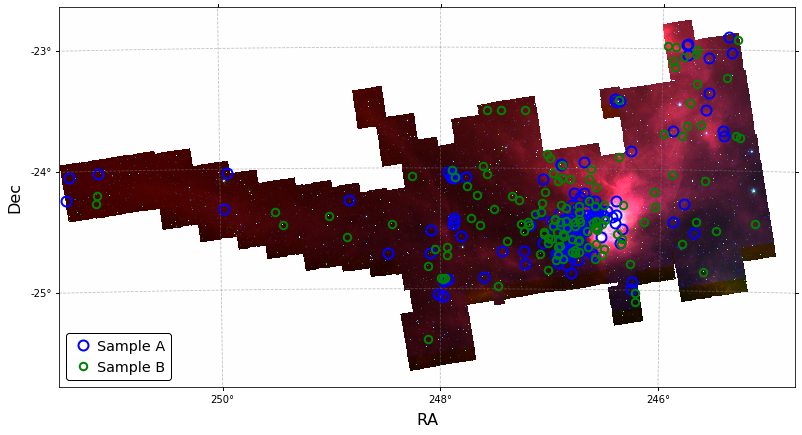

In [5]:
rgb   = np.dstack((odisea_r['data'], odisea_g['data'], odisea_b['data']))


# Plot final image ===================================
inp_img = {'data':rgb, 'hdr':odisea_r['hdr'], 'wcs':odisea_r['wcs']}
ftsize  = 16
dummy = make_img(inp_img, sample_A=odisea_A, sample_B=odisea_B, mec_a='b', mec_b='g',
                     figname='odisea_rgb_final.pdf', ftsize=ftsize, mew=2)